## Import librar


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

## Reading data and summarizing



In [4]:
df = pd.read_csv("bol_sales.csv")
df.describe() #get some summary statistics
df['gender'].value_counts() #get a simple table of this variable
df.head() #get the first rows

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
0,person_1,female,7065,4.6,30,105,117,1232
1,person_2,female,23028,9.8,23,81,70,1396
2,person_3,female,103377,9.2,11,38,94,1240
3,person_4,female,9815,3.2,16,54,124,720
4,person_5,female,22646,10.1,21,78,119,1379


## Exploratory Data Analyse

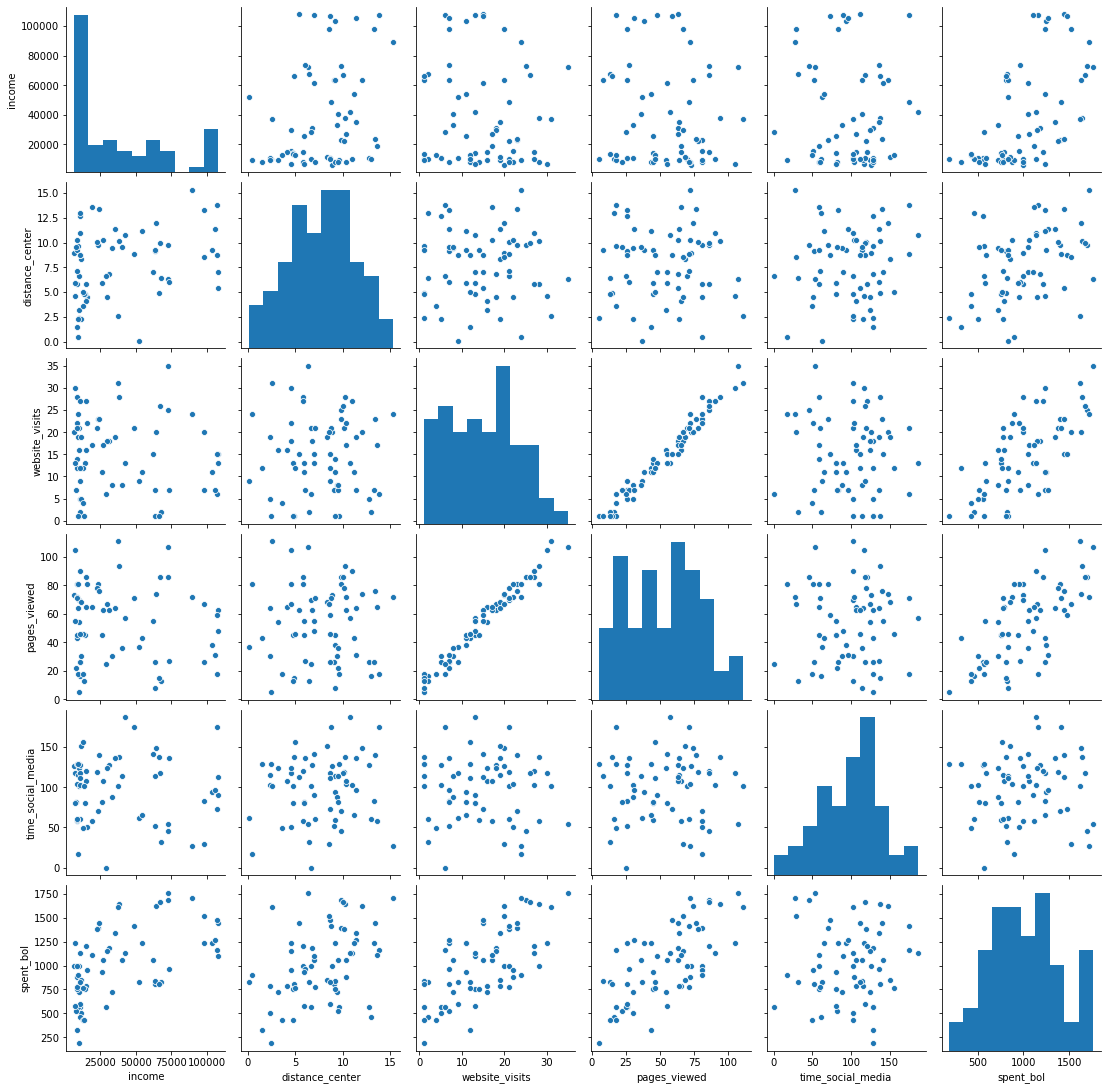

In [5]:
sns.pairplot(df) #scatter plot matrix


In [6]:
df.corr()

,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol
income,1.000000,0.298612,-0.085088,-0.095738,-0.065139,0.565621
distance_center,0.298612,1.000000,0.006597,-0.016633,0.093626,0.392954
website_visits,-0.085088,0.006597,1.000000,0.983754,-0.035425,0.677874
pages_viewed,-0.095738,-0.016633,0.983754,1.000000,-0.000302,0.682696
time_social_media,-0.065139,0.093626,-0.035425,-0.000302,1.000000,0.034558
spent_bol,0.565621,0.392954,0.677874,0.682696,0.034558,1.000000


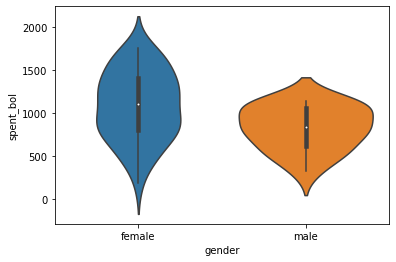

In [7]:
sns.violinplot(x='gender', y='spent_bol', data=df)

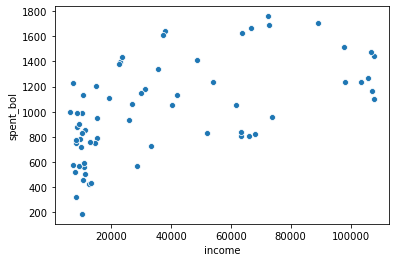

In [8]:
sns.scatterplot(x='income', y='spent_bol', data=df)

In [9]:

dummies = pd.get_dummies(df['gender'])
df = pd.concat([df, dummies], axis=1)
df.head()

,id,gender,income,distance_center,website_visits,pages_viewed,time_social_media,spent_bol,female,male
0,person_1,female,7065,4.6,30,105,117,1232,1,0
1,person_2,female,23028,9.8,23,81,70,1396,1,0
2,person_3,female,103377,9.2,11,38,94,1240,1,0
3,person_4,female,9815,3.2,16,54,124,720,1,0
4,person_5,female,22646,10.1,21,78,119,1379,1,0


In [11]:
X = df[['income', 'distance_center', 'website_visits', 'female']]
X.head()

,income,distance_center,website_visits,female
0,7065,4.6,30,1
1,23028,9.8,23,1
2,103377,9.2,11,1
3,9815,3.2,16,1
4,22646,10.1,21,1


## Build the model

In [14]:
from sklearn.linear_model import LinearRegression #the model
from sklearn.model_selection import train_test_split #the function to split the data


#Setting up the data and model
y = df['spent_bol'] #creating the y vector


lm = LinearRegression(); #create the lm object
lm.fit(X,y)
lm.coef_

array([5.80540574e-03, 2.80800553e+01, 3.11805491e+01, 1.65706613e+02])

In [15]:
y_pred = lm.predict(X)

In [16]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(df['spent_bol'],y_pred))

98.6244438311549

In [18]:
df_ho = pd.read_csv('bol_sales_holdout.csv')

dummies = pd.get_dummies(df_ho['gender'])
df_ho = pd.concat([df_ho, dummies], axis=1)

df_ho['income_log']= df_ho['income'].apply(math.log10)

X_ho = df_ho[['income_log', 'distance_center', 'website_visits', 'female']]

In [19]:
y_pred_ho = lm.predict(X_ho)

In [21]:
df_answers = pd.read_csv('bol_sales_holdout.csv')
math.sqrt(mean_squared_error(df_answers['spent_bol'],y_pred_ho))

251.03217231617595